In [46]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from pylab import *
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
from sklearn import mixture
from sklearn import cluster, preprocessing, mixture 
#　データセット読み込み
df = pd.read_csv('Perovskite_Water_Splitting.csv')

In [47]:
df

,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label,Label2
0,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO,SrTiORh
1,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,1.3,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO,SrTiORh
2,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1173.0,10.0,impreg,Rh,0.1,cubic,3.20,1.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,32.00,SrTiO,SrTiORh
3,[S1],Sr,non,non,Ti,Al,non,O,non,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,40.00,SrTiAlO,SrTiAlORh
4,[S1],Sr,non,non,Ti,Al,non,O,non,0.477,NaN,NaN,0.260,0.0010,NaN,0.261,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,2.7,1.0,0.0,NaN,NaN,Xe,300.0,300.0,380.00,SrTiAlO,SrTiAlORh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,1073.0,2.0,NaN,non,NaN,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,14.37,LaCoO,LaCoO
536,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.1,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,22.75,LaCoO,LaCoOAu
537,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.5,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,33.53,LaCoO,LaCoOAu
538,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SG,773.0,2.0,NaN,Au,1.0,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,28.74,LaCoO,LaCoOAu


In [48]:
df1 = df.loc[:,["Crystal","Prep Meth", "Prom Meth", "Label", "BandGap(eV)","ProdRate(μmol/gh)","Surface Area(m2/g)"]]

In [49]:
df1.loc[:,["Crystal","Prep Meth", "Prom Meth", "Label"]] = df1.loc[:,["Crystal","Prep Meth", "Prom Meth", "Label"]].fillna(value = 'non')

In [50]:
df1.loc[:,["BandGap(eV)","ProdRate(μmol/gh)","Surface Area(m2/g)"]] = df1.loc[:,["BandGap(eV)","ProdRate(μmol/gh)","Surface Area(m2/g)"]].fillna(method = "ffill")

In [82]:
df1

,Crystal,Prep Meth,Prom Meth,Label,BandGap(eV),ProdRate(μmol/gh),Surface Area(m2/g)
0,cubic,flux,impreg,SrTiO,3.20,540.00,0.9
1,cubic,flux,impreg,SrTiO,3.20,540.00,1.3
2,cubic,flux,impreg,SrTiO,3.20,32.00,1.9
3,cubic,flux,impreg,SrTiAlO,3.20,40.00,0.9
4,cubic,flux,impreg,SrTiAlO,3.20,380.00,2.7
...,...,...,...,...,...,...,...
535,rhombohedral,SSR,non,LaCoO,1.42,14.37,21.0
536,rhombohedral,SSR,non,LaCoO,1.42,22.75,21.0
537,rhombohedral,SSR,non,LaCoO,1.42,33.53,21.0
538,rhombohedral,SG,non,LaCoO,1.42,28.74,21.0


In [12]:
df1.values[1][1]
lis = [i  for i in df1.columns]




In [10]:
df2 = df1["Prep Meth"]

In [11]:
df2.to_csv("/home/student/water_splitting/Perovskite_Water_Splitting_Prep Meth.csv",index = False)

In [27]:
lis = []
for i in range(540):
    lis.append({})
    
lis[1]["a"] = 1
lis

for i in df["Crystal"]:
    print(i)

cubic
cubic
cubic
cubic
cubic
cubic
octahedral
octahedral
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
amorphous
hexagonal
hexagonal
hexagonal
hexagonal
hexagonal
hexagonal
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
octahedral
hexagonal
hexagonal
hexagonal
hexagonal
hexagonal
hexagonal
hexagonal
cubic
cubic
orthorombic
tetragonal
cubic
orthorombic
orthorombic
orthorombic
orthorombic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
cubic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
orthorombic
octahedral
octahedral
o

In [35]:
pd.get_dummies(df1['Prep Meth'])

,HT,PC,PTP,SG,SSR,co-pre,electrospinning,flux,ionexchange,novel
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
535,0,0,0,0,1,0,0,0,0,0
536,0,0,0,0,1,0,0,0,0,0
537,0,0,0,0,1,0,0,0,0,0
538,0,0,0,1,0,0,0,0,0,0


In [44]:
lis = []
for i in ["Crystal","Prep Meth", "Prom Meth", "Label"]:
    df = pd.get_dummies(df1[i])
    lis.append(df)

lis
df2 = pd.concat(lis, axis = 1)


,amorphous,cubic,hexagonal,monoclinic,non,octahedral,orthorombic,polyhedron,rhombohedral,tetragonal,HT,PC,PTP,SG,SSR,co-pre,electrospinning,flux,ionexchange,novel,PD,impreg,non,AgNbO,AgSbO,AgTaO,BaInTaO,BaLaTiCrO,BaNbCoO,BaNbO,BaNbTaO,BaNiNbO,BaNiTaO,BaSnZrO,BaTaO,BaTaON,BaTaZrO,BaTiO,BaZnNbO,BaZrO,BaZrSnO,BiBaNbO,BiBaTaO,BiCaNbO,BiCaTaO,BiFeO,BiKLaTaO,BiLaNbAlO,BiNaTiO,BiSrNbO,BiSrTaO,BiTaCuO,BiTaO,BiTiON,CaInS,CaLaTiCrO,CaTaO,CaTaZrO,CaTaZrON,CaTiO,CoBaNbO,CoCaNbO,CoSrNbO,CrTiTaO,CuInGaS,CuInS,GaFeO,GaInO,InBaNbO,InCaNbO,InNiTaON,InSrNbO,InTaO,KCaSrTaO,KLaTaBiO,KNbO,KNbZrO,KSnTiO,KTaO,KTaZrO,KTiO,LaCoO,LaFeO,LaFeTiO,LaHNbInO,LaHNbO,LaHTaO,LaInO,LaKTaO,LaNbO,LaNbTaO,LaNiCuO,LaSrFeO,LaSrFeTiO,LaTaAlO,LaTaO,LaTiO,LiNbO,LiTaO,MnCoO,NaBaTaO,NaBiTaO,NaCaNbO,NaCaTaO,NaCeTaO,NaKTaO,NaLaTaCoO,NaLaTaCrO,NaLaTaO,NaLaTiO,NaNbInO,NaNbO,NaSbO,NaSrTaO,NaTaBiO,NaTaNbO,NaTaO,NaTiO,NaTiZrO,NaYTaO,NaYbTaO,NiGaO,SbNbO,SbTaO,SbTiS,SmTiOS,SrAgTiO,SrBaSnO,SrBiTaCeO,SrBiTaO,SrBiTiFeO,SrCrTiO,SrCrTiSbO,SrCrTiTaO,SrHNbO,SrHTaNbO,SrHTaO,SrKNbO,SrLaTiCrO,SrLaTiO,SrNaTiO,SrNbAlO,SrNiTiTaO,SrSnO,SrTaO,SrTiAlO,SrTiFeO,SrTiO,SrTiRhSbO,SrZrO,YInO,YNbO,YTaO,YTiO,ZnAgInS,ZnCdS,ZnCuCdS,ZnGaO,ZnInS,ZnTiS
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [41]:
df1
df2 = pd.get_dummies(df1['Prep Meth'])
df2

,HT,PC,PTP,SG,SSR,co-pre,electrospinning,flux,ionexchange,novel
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
535,0,0,0,0,1,0,0,0,0,0
536,0,0,0,0,1,0,0,0,0,0
537,0,0,0,0,1,0,0,0,0,0
538,0,0,0,1,0,0,0,0,0,0


0.13790402294078952


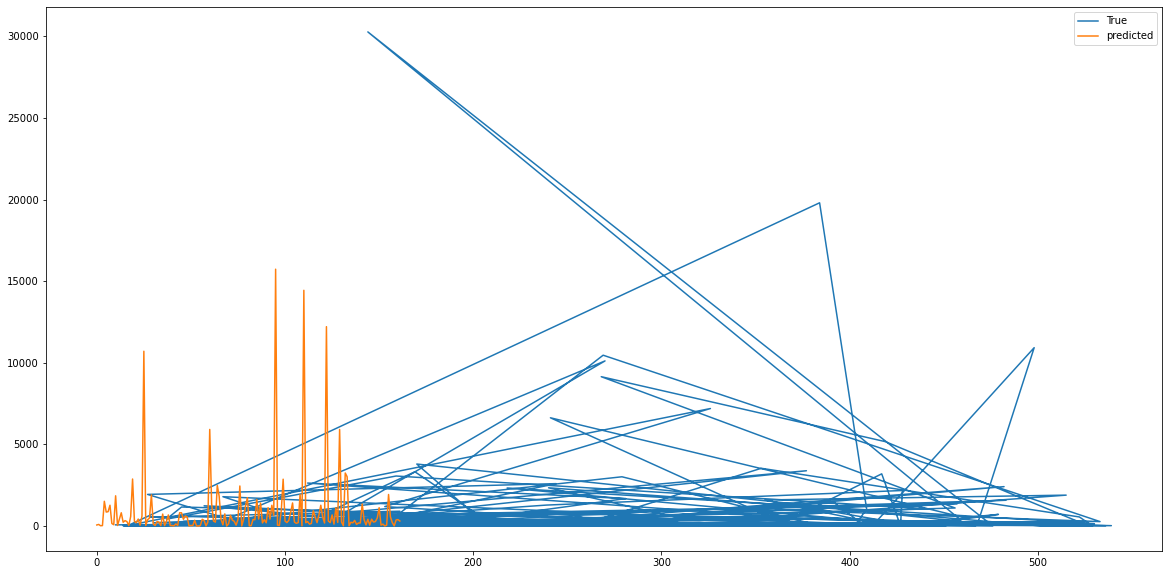

In [80]:
lis = []
for i in ["Crystal","Prep Meth", "Prom Meth", "Label"]:
    df = pd.get_dummies(df1[i])
    lis.append(df)

lis
df2 = pd.concat(lis, axis = 1)
df2

X = df2
y = df1["ProdRate(μmol/gh)"]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor as RFR


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.3,
                                                random_state = 3)

rg = RFR(n_jobs=-1, random_state=540)
rg.fit(Xtrain, ytrain)
ypred = rg.predict(Xtest)

print(rg.score(Xtest, ytest))

plt.figure(figsize=(20,10))
plt.plot(ytest,label="True")
plt.plot(ypred, label="predicted")
plt.legend()

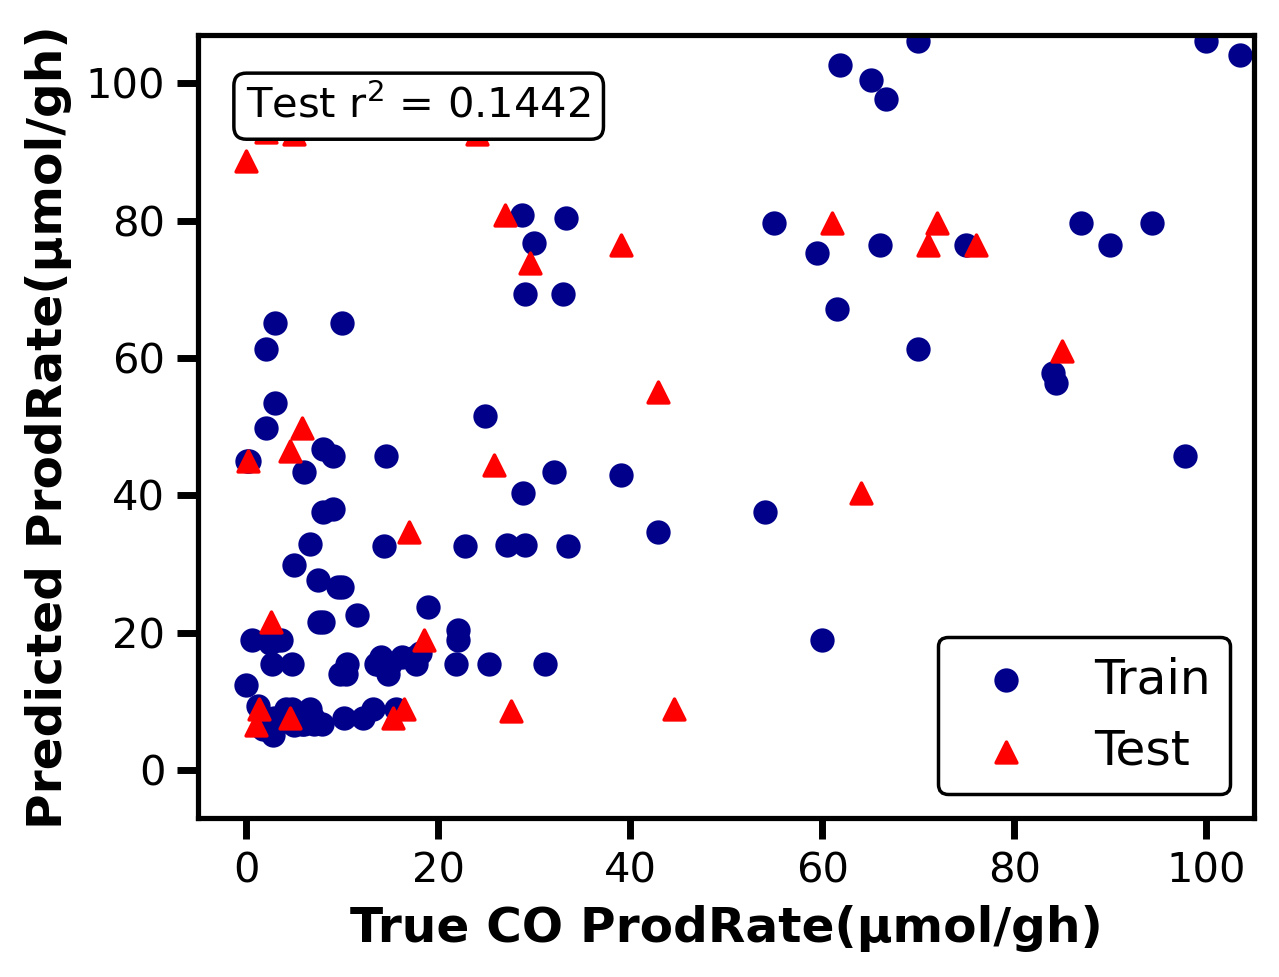

In [110]:
##################################################################################################
## Library imports  ##############################################################################
##################################################################################################

import os

import numpy as np
import pandas as pd
from statistics import mean

from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib.patches as mpatches
plt.style.use('default')

##################################################################################################
## Data loading ##################################################################################
##################################################################################################

current_directory = os.getcwd()

df = pd.read_csv(current_directory + '/Perovskite_Water_Splitting.csv')

##################################################################################################
## Creation of true-predicted dataframes for the model ###########################################
##################################################################################################

# Variable classification and model loading

lis = []
for i in ["Crystal","Prep Meth", "Prom Meth", "Label"]:
    df = pd.get_dummies(df1[i])
    lis.append(df)

lis
df2 = pd.concat(lis, axis = 1)
df2


descriptor_array = np.array(df2)

target = np.array(df1["ProdRate(μmol/gh)"])

model = RandomForestRegressor(random_state = 0, n_estimators = 100)

# Calculation of the average model score

placeholder_scores = []

for j in range(0, 10):
    
    X_train, X_test, y_train, y_test = train_test_split(descriptor_array, target, test_size = 0.2, 
                                                        
                                                        random_state = j)
    
    model.fit(X_train, y_train)
    
    placeholder_scores.append(model.score(X_test, y_test))
    
# Calculate the average model score
    
model_score = round(mean(placeholder_scores), 4)

# Split the data using the random state with the highest score and train the model

X_train, X_test, y_train, y_test = train_test_split(descriptor_array, target, test_size = 0.2, 
                                                    
                                random_state = placeholder_scores.index(max(placeholder_scores)))

model.fit(X_train, y_train)

# Creation of the true vs predicted dataframes

# Training data

train_x = []

train_y = []

for i, j in zip(X_train, y_train):
    
    train_x.append(model.predict([i])[0])
    
    train_y.append(j)
    
train_df = pd.DataFrame(data = {'Train_Predict': train_x, 'Train_True': train_y})
    
# Testing data

test_x = []

test_y = []

for i, j in zip(X_test, y_test):
    
    test_x.append(model.predict([i])[0])
    
    test_y.append(j)

test_df = pd.DataFrame(data = {'Test_Predict': test_x, 'Test_True': test_y})

##################################################################################################
## Plot visualization  ###########################################################################
##################################################################################################

fig, ax = plt.subplots(1, 1, figsize=(5, 3.75), dpi = 250, constrained_layout = True)

# Plotting training data

ax.scatter(train_df['Train_True'], train_df['Train_Predict'], c = 'darkblue', label = 'Train')

#Plotting testing data

ax.scatter(test_df['Test_True'], test_df['Test_Predict'], c = 'red', marker = '^', label = 'Test')

# Legend
    
ax.legend(loc = 'lower right', fontsize = 14, facecolor = 'white', framealpha = 1, edgecolor = 'black')

# Settings for the box that displays the model score

box = dict(boxstyle = 'round', facecolor = 'white')
    
ax.text(0, 95, f'Test r$^2$ = {model_score}', fontsize = 12, bbox = box)

# Plot axis labels
    
ax.set_ylabel('Predicted ProdRate(μmol/gh)', fontsize = 14, fontweight = 'bold')

ax.set_xlabel('True CO ProdRate(μmol/gh)',fontsize = 14, fontweight = 'bold')

# Adjusting axis limits
    
ax.set_ylim(-7, 107)
    
ax.set_xlim(-5, 105)

# Tick formatting
    
ax.tick_params(axis = 'both', labelsize = 12, length = 6, width = 2)

# Axis spine formatting
    
for axis in ['top','bottom','left','right']:
    
    ax.spines[axis].set_linewidth(1.5)
    
    ax.spines[axis].set_color('black')

#Setting to export the plot as an image 

#plt.savefig('plot.svg', format = 'svg', dpi = 'figure')

plt.show()

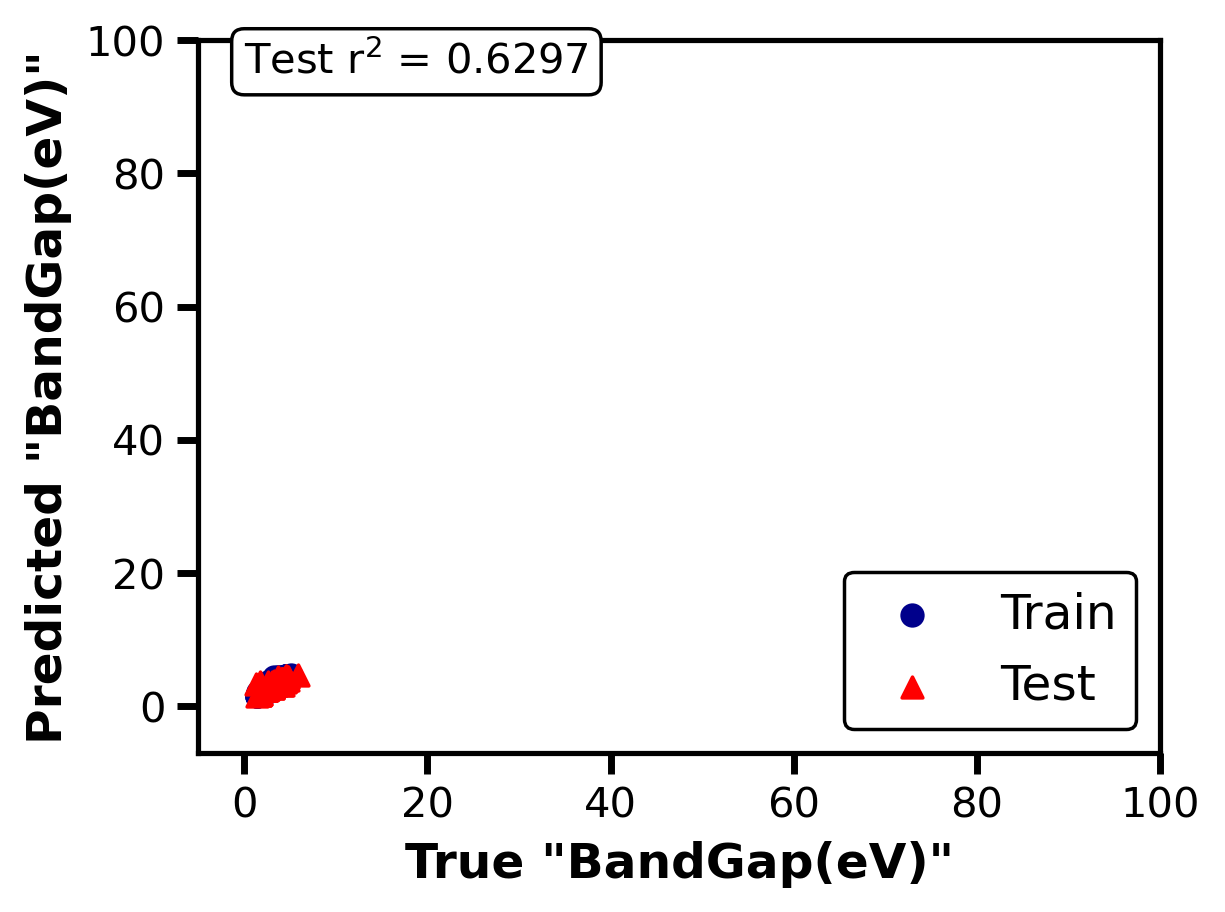

In [130]:
##################################################################################################
## Library imports  ##############################################################################
##################################################################################################

import os

import numpy as np
import pandas as pd
from statistics import mean

from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib.patches as mpatches
plt.style.use('default')

##################################################################################################
## Data loading ##################################################################################
##################################################################################################

current_directory = os.getcwd()

df = pd.read_csv(current_directory + '/Perovskite_Water_Splitting.csv')

##################################################################################################
## Creation of true-predicted dataframes for the model ###########################################
##################################################################################################

# Variable classification and model loading

lis = []
for i in ["Crystal","Prep Meth", "Prom Meth", "Label"]:
    df = pd.get_dummies(df1[i])
    lis.append(df)

lis
df2 = pd.concat(lis, axis = 1)
df2


descriptor_array = np.array(df2)

target = np.array(df1["BandGap(eV)"])

model = RandomForestRegressor(random_state = 0, n_estimators = 100)

# Calculation of the average model score

placeholder_scores = []

for j in range(0, 10):
    
    X_train, X_test, y_train, y_test = train_test_split(descriptor_array, target, test_size = 0.2, 
                                                        
                                                        random_state = j)
    
    model.fit(X_train, y_train)
    
    placeholder_scores.append(model.score(X_test, y_test))
    
# Calculate the average model score
    
model_score = round(mean(placeholder_scores), 4)

# Split the data using the random state with the highest score and train the model

X_train, X_test, y_train, y_test = train_test_split(descriptor_array, target, test_size = 0.2, 
                                                    
                                random_state = placeholder_scores.index(max(placeholder_scores)))

model.fit(X_train, y_train)

# Creation of the true vs predicted dataframes

# Training data

train_x = []

train_y = []

for i, j in zip(X_train, y_train):
    
    train_x.append(model.predict([i])[0])
    
    train_y.append(j)
    
train_df = pd.DataFrame(data = {'Train_Predict': train_x, 'Train_True': train_y})
    
# Testing data

test_x = []

test_y = []

for i, j in zip(X_test, y_test):
    
    test_x.append(model.predict([i])[0])
    
    test_y.append(j)

test_df = pd.DataFrame(data = {'Test_Predict': test_x, 'Test_True': test_y})

##################################################################################################
## Plot visualization  ###########################################################################
##################################################################################################

fig, ax = plt.subplots(1, 1, figsize=(5, 3.75), dpi = 250, tight_layout = True)

# Plotting training data

ax.scatter(train_df['Train_True'], train_df['Train_Predict'], c = 'darkblue', label = 'Train')

#Plotting testing data

ax.scatter(test_df['Test_True'], test_df['Test_Predict'], c = 'red', marker = '^', label = 'Test')

# Legend
    
ax.legend(loc = 'lower right', fontsize = 14, facecolor = 'white', framealpha = 1, edgecolor = 'black')

# Settings for the box that displays the model score

box = dict(boxstyle = 'round', facecolor = 'white')
    
ax.text(0, 95, f'Test r$^2$ = {model_score}', fontsize = 12, bbox = box)

# Plot axis labels
    
ax.set_ylabel('Predicted "BandGap(eV)"', fontsize = 14, fontweight = 'bold')

ax.set_xlabel('True "BandGap(eV)"',fontsize = 14, fontweight = 'bold')

# Adjusting axis limits
    
ax.set_ylim(-7, 100)
    
ax.set_xlim(-5, 100)

# Tick formatting
    
ax.tick_params(axis = 'both', labelsize = 12, length = 6, width = 2)

# Axis spine formatting
    
for axis in ['top','bottom','left','right']:
    
    ax.spines[axis].set_linewidth(1.5)
    
    ax.spines[axis].set_color('black')

#Setting to export the plot as an image 

#plt.savefig('plot.svg', format = 'svg', dpi = 'figure')

plt.show()

In [107]:

train_x = []

train_y = []

for i, j in zip(X_train, y_train):
    print((i,j))
    #train_x.append(model.predict([i])[0])
    
    #train_y.append(j)
    

('amorphous', 10.4)
('cubic', 50.0)
('hexagonal', 500.0)
('monoclinic', 1223.0)
('non', 9.5)
('octahedral', 66.0)
('orthorombic', 32.0)
('polyhedron', 124.0)
('rhombohedral', 430.0)
('tetragonal', 1416.4)
('HT', 1900.0)
('PC', 135.0)
('PTP', 722.0)
('SG', 237.0)
('SSR', 10466.0)
('co-pre', 9000.0)
('electrospinning', 940.0)
('flux', 55.0)
('ionexchange', 3460.0)
('novel', 1018.0)
('PD', 87.0)
('impreg', 460.0)
('non', 22.0)
('AgNbO', 28.0)
('AgSbO', 10.2)
('AgTaO', 19560.0)
('BaInTaO', 560.0)
('BaLaTiCrO', 82.5)
('BaNbCoO', 90.0)
('BaNbO', 9.8)
('BaNbTaO', 2.5)
('BaNiNbO', 266.0)
('BaNiTaO', 0.3)
('BaSnZrO', 514.0)
('BaTaO', 3.1)
('BaTaON', 220.0)
('BaTaZrO', 649.0)
('BaTiO', 545.0)
('BaZnNbO', 100.0)
('BaZrO', 5233.0)
('BaZrSnO', 1287.5)
('BiBaNbO', 100.0)
('BiBaTaO', 319.0)
('BiCaNbO', 300.0)
('BiCaTaO', 296.0)
('BiFeO', 218.9)
('BiKLaTaO', 65.1)
('BiLaNbAlO', 335.0)
('BiNaTiO', 134.8)
('BiSrNbO', 386.7)
('BiSrTaO', 3.0)
('BiTaCuO', 380.0)
('BiTaO', 9860.0)
('BiTiON', 156.0)
('CaInS'

In [113]:
df1

,Crystal,Prep Meth,Prom Meth,Label,BandGap(eV),ProdRate(μmol/gh),Surface Area(m2/g)
0,cubic,flux,impreg,SrTiO,3.20,540.00,0.9
1,cubic,flux,impreg,SrTiO,3.20,540.00,1.3
2,cubic,flux,impreg,SrTiO,3.20,32.00,1.9
3,cubic,flux,impreg,SrTiAlO,3.20,40.00,0.9
4,cubic,flux,impreg,SrTiAlO,3.20,380.00,2.7
...,...,...,...,...,...,...,...
535,rhombohedral,SSR,non,LaCoO,1.42,14.37,21.0
536,rhombohedral,SSR,non,LaCoO,1.42,22.75,21.0
537,rhombohedral,SSR,non,LaCoO,1.42,33.53,21.0
538,rhombohedral,SG,non,LaCoO,1.42,28.74,21.0


In [108]:
y_train

138      10.400
32       50.000
350     500.000
374    1223.000
109       9.500
         ...   
318       0.001
362     540.000
335       5.800
365     160.000
227      94.400
Name: ProdRate(μmol/gh), Length: 432, dtype: float64